In [1]:
import json
import infosys.utils as utils 
import igraph as ig
import os
import collections
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle as pkl
import collections
import sys
from  scipy.stats import entropy
from scipy.special import entr


In [37]:
def deltaflux_timestep(nostrag_flux, strag_flux, flow_type='bot', ylog=True, common_timestep=True, plot_fpath=None):
    # nostrag_influx, strag_influx: dictionary containing number of meme in or out flux (for no targeting and targeting)
    # structure: {'bot_in': [], 'bot_out': [], 'human_in': [], 'human_out': []}, each element is a timestep
    # flow_type: 'bot' or 'human'
    # common timestep: one strategy can take longer to converge than the other. Only plot the timestep they have in common on x axis.
    # markers = list('.s*o^v<>+x')
    fig,ax = plt.subplots(figsize=(8,5))
    
    ax.set_yscale('symlog')
    inflow='%s_in' %flow_type
    outflow='%s_out' %flow_type
    nostrag_delta = np.subtract(nostrag_flux[inflow], nostrag_flux[outflow])
    strag_delta = np.subtract(strag_flux[inflow], strag_flux[outflow])

    if common_timestep is True:
        common = min(len(strag_delta), len(nostrag_delta)) 
        nostrag_delta = nostrag_delta[:common+1]
        strag_delta = strag_delta[:common+1]
    
    ax.plot(range(len(strag_delta)), strag_delta, '-',label='targeting')
    ax.plot(range(len(nostrag_delta)), nostrag_delta, '--',label='no targeting')
    
#     ylow=min(min(strag_delta), min(nostrag_delta))
#     yup=max(max(strag_delta), max(nostrag_delta))
    
#     ax.set_ylim(ylow, yup)
    ax.set_ylabel('memes')
    ax.set_xlabel('t')
    ax.set_title('Delta (in-out) %s memes across timesteps' %flow_type)
    ax.legend()
    
    if plot_fpath is not None:
        fig.savefig(plot_fpath, dpi=300)
        plt.close(fig)
    else:
        fig.show()


In [29]:
flow_type='bot'
nostrag_flux = none_verbose['meme_influx'][0]
strag_flux = hub_verbose['meme_influx'][0]
inflow='%s_in' %flow_type
outflow='%s_out' %flow_type
nostrag_delta = np.subtract(nostrag_flux[inflow], nostrag_flux[outflow])
strag_delta = np.subtract(strag_flux[inflow], strag_flux[outflow])
common = min(len(strag_delta), len(nostrag_delta)) 

In [30]:
nostrag_delta

array([26524,  -343, 21899, -5201,   -77, -1247, 16907, -6910, -2213,
       -5424, -1220,  1877,  6698, -2023,  2432,  -709,  2234, -1953,
       -4710, -1086])

In [31]:


nostrag_delta = nostrag_delta[:common+1]
strag_delta = strag_delta[:common+1]

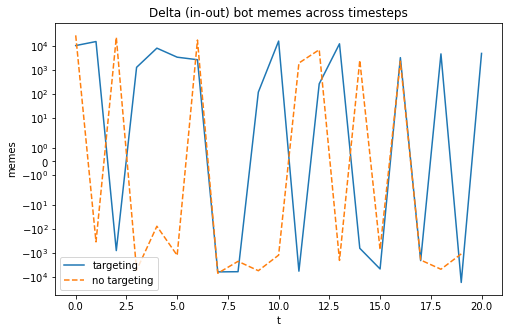

In [38]:

ABS_PATH = '/N/slate/baotruon/marketplace'
DATA_PATH = '/N/slate/baotruon/marketplace/data'

config_fname= os.path.join(DATA_PATH, 'all_configs.json')

# CHANGE THESE VARS FOR OTHER INFILTRATION VALUES
exp = 'vary_thetaphi_1runs_trackmeme_gamma0.005'
hub_expname='hubs_22'
none_expname='none_22'

# exp=sys.argv[1]
# hub_expname = sys.argv[2]
# none_expname = sys.argv[3]
# plot_folder=sys.argv[4]

RES_DIR = os.path.join(ABS_PATH,'results', exp)
TRACKING_DIR = os.path.join(ABS_PATH,'long_results',exp)

hub_verbose = utils.read_json_compressed(os.path.join(TRACKING_DIR,'%s.json.gz' %hub_expname))
none_verbose = utils.read_json_compressed(os.path.join(TRACKING_DIR,'%s.json.gz' %none_expname))
deltaflux_timestep(none_verbose['meme_influx'][0], hub_verbose['meme_influx'][0], flow_type='bot')
#                                         plot_fpath=os.path.join(PLOT_DIR, 'delta_%s_%s%s.png' %(flowtype, none_expname, hub_expname)))